**All 19 problems are given equal weight but if you mess up a problem that is needed to be done correctly for some later problem you may lose points on both - so be careful!!**

**Execute the following cell so that you don't have to import any packages later**

In [1]:
# Do not delete or modify this cell
# Do execute it
import numpy as np
import pandas as pd
import datetime
import re

**Problem 1.**

In the following cell, create a pandas data frame called **df** using the data in the PFE.csv file and convert the data type of the TransDate column to pandas datetimes.

In [2]:
# Code cell for Problem 1 - do not delete or modify this line
df = pd.read_csv('PFE.csv')
df['TransDate'] = pd.to_datetime(df['TransDate'])

**Problem 2**

In the following cell create a histogram of the Shares column

<Axes: >

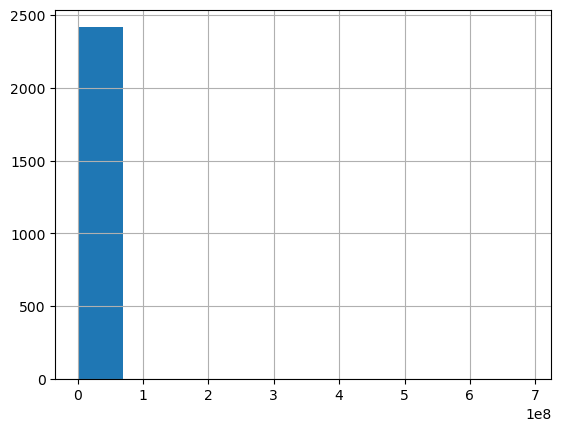

In [3]:
# Code cell for Problem 2 - do not delete or modify this line.
df["Shares"].hist()

**Problem 3** 

The last histogram is problematic. Make a histogram of log(1+Shares) in the following cell.

<Axes: >

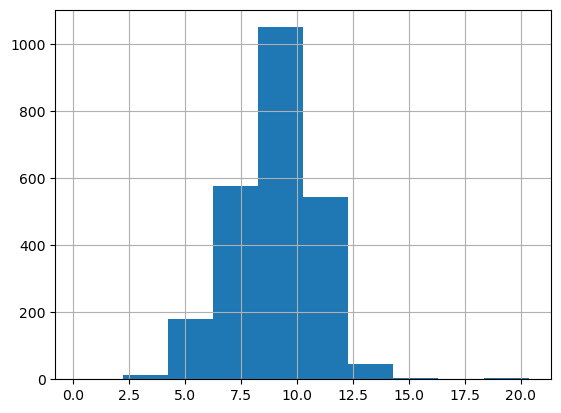

In [4]:
# Code cell for Problem 3 - do not delete or modify this line.
np.log1p(df['Shares']).hist()

**Problem 4**

In the following code cell, print a pandas series with the OwnerName corresponding to the 25 largest values of Shares in the data frame.

In [5]:
# Code cell for Problem 4 - do not remove or modify this line
owners = df.nlargest(25, 'Shares')['OwnerName']
owners

387              PFIZER INC
386              PFIZER INC
381              PFIZER INC
382              PFIZER INC
402              PFIZER INC
383              PFIZER INC
401              PFIZER INC
380              PFIZER INC
392              PFIZER INC
390              PFIZER INC
403              PFIZER INC
1181             PFIZER INC
406              PFIZER INC
397              PFIZER INC
385              PFIZER INC
170     STEERE WILLIAM C JR
408              PFIZER INC
1362             READ IAN C
399              PFIZER INC
182     STEERE WILLIAM C JR
183     STEERE WILLIAM C JR
169     STEERE WILLIAM C JR
1405             READ IAN C
1182             PFIZER INC
1611             READ IAN C
Name: OwnerName, dtype: object

**Problem 5**

We're only interested in transactions corresponding to a person. Write a function **pfizer_substring** that takes as input a string and outputs True if the input string contains "pfizer" as a substring (without the quotation marks). **You should make your test case insensitive.**

In [6]:
# Code cell for Problem 5 - do not delete or modify this line
def pfizer_substring(x):
    return 'pfizer' in x.lower()

In [7]:
# Test cell for Problem 5 - do not delete or modify this cell
# Do execute it
print(pfizer_substring("JOE PFIZER SMITH"))
print(pfizer_substring("PFEIZER"))
print(pfizer_substring("PfIZER"))

True
False
True


**Problem 6**

Use the function you created in Problem 5 to create a new data frame that contains all rows in the previous data frame whose OwnerName does not contain "pfizer" as a substring (case insensitive).

Call your new dataframe **df2.**

In [8]:
# Code cell for Problem 6 - do not delete or modify this line
df2 = df[~df['OwnerName'].apply(pfizer_substring)]

In [9]:
# Test cell for Problem 6 - do not delete or modify this cell
# Do execute it
print(df2.shape)

(2370, 12)


**From this point on, all questions will be based on the data in df2 i.e. all transactions in which Pfizer is the owner should be ignored**

**Problem 7**

Write a function called **df_summary** that takes as input 

- a **data frame** all of whose transaction dates are identical and having the same columns as df2 (think of this as the result of selecting all rows in df2 with a  particular TransDate) 

and that outputs 

- a **dictionary** whose keys correspond to the owner names appearing in the input data frame, and whose value for some key is a 3-tuple with 
> - the 0th entry of the 3-tuple should be a list of the Shares for transactions for that owner on that date
> - the 1th entry of the 3-tuple should be a list containing the price per share for each transaction in the list making up the 0th entry list (using the same order)
> - the 2-th entry of the 3-tuple should be a list of the ADCodes corresponding to each transaction in the 0th entry list (using the same order)


In [10]:
# Code cell for Problem 7 - do not delete or modify this line 
def df_summary(dt):
    summary = dict()
    for owner in dt['OwnerName'].unique():
        owner_data = dt[dt['OwnerName'] == owner]
        shares = owner_data['Shares'].tolist()
        prices = owner_data['PPS'].tolist()
        adcodes = owner_data['ADCode'].tolist()
        summary[owner] = (shares, prices, adcodes)
    return summary

In [11]:
# Test cell for Problem 7 - do not delete or modify this cell
# Do execute it
g=df2.groupby("TransDate")
dt=g.get_group("2004-02-26")
df_summary(dt)

{'CANGIALOSI LORETTA V': ([13560.0, 1175.0], [0.0, 37.15], ['A', 'D']),
 'CORR PETER B': ([35460.0], [0.0], ['A']),
 'HARDWICK CHARLES L': ([15480.0], [0.0], ['A']),
 'KATEN KAREN L': ([40680.0, 16049.0], [0.0, 37.15], ['A', 'D']),
 'KINDLER JEFFREY B': ([23100.0], [0.0], ['A']),
 'MCKINNELL HENRY A': ([75060.0], [0.0], ['A']),
 'MITCHELL JOHN W': ([18810.0], [0.0], ['A']),
 'SHEDLARZ DAVID L': ([32760.0, 12924.0], [0.0, 37.15], ['A', 'D']),
 'LAMATTINA JOHN L': ([17910.0, 5633.0], [0.0, 37.15], ['A', 'D'])}

**Problem 8**

Use the function in Problem 7 to create a series **df2** called **TransDateSummary** that has a row for each date in which there is at least one non-derivative transaction, whose index consists of the transaction dates and whose values are the dictionaries produced by the function in Problem 7 for every transaction date.
Try to make your code use as few lines as possible. (Aim for at most 2!!!)

In [12]:
# Code cell for Problem 8 - do not delete or modify this line 
TransDateSummary = df2.groupby('TransDate').apply(df_summary)

**Problem 9**

Use your series in Problem 8 to create a data frame called **TransDateSummaryDF** 
with

- 0,1,2,.... and has two columns:
- a column called **TDate** with the transaction dates in the TransDateSummary index, **converted to datetime** using the pd.to_datetime function, ordered from first to last date
- a column of values called **TDSummary** that consists of the corresponding dictionaries in the series.

In [13]:
# Code cell for Problem 9 - do not delete or modify this line 
TransDateSummaryDF = pd.DataFrame({
    'TDate': pd.to_datetime(TransDateSummary.index),
    'TDSummary': TransDateSummary.values})

In [14]:
# Test cell1 for Problem 9 - do not delete or modify this cell
# Do execute it
print(TransDateSummaryDF.iloc[123])
print(TransDateSummaryDF.iloc[78])
print(TransDateSummaryDF.iloc[234])
print(TransDateSummaryDF.iloc[319])

TDate                                  2009-02-27 00:00:00
TDSummary    {'SUSMAN SALLY': ([10835.0], [12.31], ['D'])}
Name: 123, dtype: object
TDate                                      2007-01-31 00:00:00
TDSummary    {'KINDLER JEFFREY B': ([7660.0], [0.0], ['D'])...
Name: 78, dtype: object
TDate                                      2015-12-03 00:00:00
TDSummary    {'CANGIALOSI LORETTA V': ([330.0], [0.0], ['D'])}
Name: 234, dtype: object
TDate                              2019-11-29 00:00:00
TDSummary    {'Hwang Angela': ([216.0], [0.0], ['D'])}
Name: 319, dtype: object


**Problem 10**

Do any of the owners status (director, officer, ten percent owner) every change?

Make a list called ***SummaryOfChanges** that summarizes all such changes. 

Your list should contain a 4-tuple for each instance in which, for some owner the status variable that changed on some transaction date and differs for that owner from the status on the most recent preceding transaction date.
The tuple should contain:

- owner name
- transaction date when status changed
- name of status ("IsDir","IsOff","IsTen") that changed
- value of status on the date when the change took place

You should do this with the data frame for which PFIZER is not the owner.

Use the following cell for your code.

In [15]:
# Code cell for Problem 10 - do not delete or modify this line
status_columns = ['IsDir', 'IsOff', 'IsTen']
SummaryOfChanges = []
for owner in df2['OwnerName'].unique():
    owner_data = df2[df2['OwnerName'] == owner]
    for i in range(1, len(owner_data)):
        current_row = owner_data.iloc[i]
        previous_row = owner_data.iloc[i-1]
        for status in status_columns:
            if current_row[status] != previous_row[status]:
                SummaryOfChanges.append((owner, current_row['TransDate'], status, current_row[status]))
SummaryOfChanges[:5]

[('MCKINNELL HENRY A', Timestamp('2006-08-02 00:00:00'), 'IsOff', 0),
 ('KINDLER JEFFREY B', Timestamp('2006-09-05 00:00:00'), 'IsDir', 1),
 ('READ IAN C', Timestamp('2011-02-24 00:00:00'), 'IsDir', 1),
 ('BOURLA ALBERT', Timestamp('2018-02-24 00:00:00'), 'IsDir', 1)]

In [16]:
# Test cell for Problem 10 - do not delete or modify this cell
# Do execute it
print(len(SummaryOfChanges))
for x in SummaryOfChanges:
    print(x)

4
('MCKINNELL HENRY A', Timestamp('2006-08-02 00:00:00'), 'IsOff', 0)
('KINDLER JEFFREY B', Timestamp('2006-09-05 00:00:00'), 'IsDir', 1)
('READ IAN C', Timestamp('2011-02-24 00:00:00'), 'IsDir', 1)
('BOURLA ALBERT', Timestamp('2018-02-24 00:00:00'), 'IsDir', 1)


**Problem 11**

Create a dataframe called **df3** containing a row for each date on which a transaction took place with the following columns:

- **tdate** = transaction date\
- **dayoweek** = which day of the week did the transaction take place on ("Mon","Tue","Wed","Thu","Fri","Sat","Sun")
- **month** = month in which transaction took place 
("Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec")
- **day** = day number in which transaction took place e.g. for July 23, 2003 the day would be 23
- **year** = year of transaction date 
- **ntrans** = number of transactions on that date i.e. number of rows in df2 with this transaction date
- **ashares** = total number of shares acquired on that date
- **atrans** = total number of transactions on that date that in which shares were acquired
- **dshares** = total number of shares disposed of on that date
- **dtrans** total number of transactions on that date in which shares were disposed of
- **nowners** total number of owners who had transactions on that date

Make your dataframe sorted by tdate, and make the index 0,1,2,...

In [17]:
# Code cell for Problem 11 - do not delete or modify this line
def summarize_date(dt):
    tdate = dt['TransDate'].iloc[0]
    summary = {
        'tdate': tdate,
        'dayoweek': tdate.strftime('%a'),
        'month': tdate.strftime('%b'),
        'day': tdate.day,
        'year': tdate.year,
        'ntrans': len(dt),
        'ashares': dt[dt['ADCode'] == 'A']['Shares'].sum(),
        'atrans': len(dt[dt['ADCode'] == 'A']),
        'dshares': dt[dt['ADCode'] == 'D']['Shares'].sum(),
        'dtrans': len(dt[dt['ADCode'] == 'D']),
        'nowners': len(dt['OwnerName'].unique())}
    return summary
df3 = pd.DataFrame(df2.groupby('TransDate').apply(summarize_date).tolist())
df3

,tdate,dayoweek,month,day,year,ntrans,ashares,atrans,dshares,dtrans,nowners
0,2003-07-30,Wed,Jul,30,2003,1,19044.0,1,0.0,0,1
1,2003-08-20,Wed,Aug,20,2003,1,0.0,0,61.0,1,1
2,2003-08-27,Wed,Aug,27,2003,2,3600.0,1,682.0,1,1
3,2003-10-02,Thu,Oct,2,2003,8,73225.0,4,18793.0,4,1
4,2003-10-06,Mon,Oct,6,2003,2,20109.0,1,1597.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
371,2023-03-15,Wed,Mar,15,2023,1,0.0,0,9912.0,1,1
372,2023-03-31,Fri,Mar,31,2023,1,0.0,0,22095.0,1,1
373,2023-05-05,Fri,May,5,2023,1,1000.0,1,0.0,0,1
374,2023-05-08,Mon,May,8,2023,1,1000.0,1,0.0,0,1


In [18]:
# Test cell for Problem 11 - do not delete or modify this cell
# Do execute it
print(df3.shape)
I=[25,50,75,100, 125,150,175, 200, 225,250,275,300]
print(df3.iloc[I])
df3.dtypes

(376, 11)
         tdate dayoweek month  day  year  ntrans    ashares  atrans  \
25  2004-06-09      Wed   Jun    9  2004       4     1216.0       2   
50  2005-12-15      Thu   Dec   15  2005       1        0.0       0   
75  2006-12-22      Fri   Dec   22  2006       1        0.0       0   
100 2007-12-31      Mon   Dec   31  2007       1        0.0       0   
125 2009-05-11      Mon   May   11  2009       1        0.0       0   
150 2010-11-03      Wed   Nov    3  2010       1        0.0       0   
175 2012-12-31      Mon   Dec   31  2012       5        0.0       0   
200 2014-02-26      Wed   Feb   26  2014      50  1605310.0      25   
225 2015-03-05      Thu   Mar    5  2015      34        0.0       0   
250 2016-06-30      Thu   Jun   30  2016       1        0.0       0   
275 2017-12-08      Fri   Dec    8  2017       1        0.0       0   
300 2019-01-30      Wed   Jan   30  2019       8        0.0       0   

       dshares  dtrans  nowners  
25      1824.0       2        1 

tdate       datetime64[ns]
dayoweek            object
month               object
day                  int64
year                 int64
ntrans               int64
ashares            float64
atrans               int64
dshares            float64
dtrans               int64
nowners              int64
dtype: object

**Problem 12**

Consider 10 year period defined by years 2013,...,2022. Use df3 to determine 

- the total number of days in which transactions took place 
during the entire period (assign this to a variable called **NTransactionDays**),

- the year during this period with the most transaction days (assign this to **YearOfMaxTransactionDays**), and

- the number of transaction days during the year with the most transaction days (assign this to a variable called **MaxTransactionDays**).

Use the following cell for your code.

In [19]:
# Code cell for Problem 12 - do not delete or modify this line
period = df3[(df3['year'] >= 2013) & (df3['year'] <= 2022)]
NTransactionDays = len(period)
YearOfMaxTransactionDays = period['year'].value_counts().index[0]
MaxTransactionDays = period['year'].value_counts().iloc[0]

In [20]:
# Test cell for Problem 12 - do not delete or modify this cell
# Do execute it
print(NTransactionDays)
print(YearOfMaxTransactionDays)
print(MaxTransactionDays)


190
2016
23


**Problem 13**

Is the maximum number of transaction days in a year during the 10 year period found in the Problem 12 explainable by chance alone? To answer this, take the total number of transactions (NTransactionDays) in the 10 year period and randomly assign them to years by sampling a year with replacement for each transaction and determine in 10,000 Monte-Carlo trials the proportion of trials that occur in which the maximun number of transactions in a year is at least the maximum obtained from the actual data (MaxTransactionDays).

Use the following cell for your code and in that cell assign the proportion to a variable called **ProportionOfTrials**.

In [21]:
# Code cell for Problem 13 - do not delete or modify this line
count = 0
years = list(range(2013, 2023))
for _ in range(10000):
    random_years = np.random.choice(list(years), NTransactionDays)
    transaction_count = pd.Series(random_years).value_counts()
    if transaction_count.max() >= MaxTransactionDays:
        count += 1
ProportionOfTrials = count / 10000

In [22]:
# Test cell for Problem 13 - do not delete or modify this cell
# Do execute it
print(ProportionOfTrials)

0.9598


**Problem 14**

Use the data frame df3 to create a new dataframe called **FebruaryDF** that contains a single row for every year (2004-2023) that has year as an index and contains the following columns:

- **ntrans** = total number of transactions that took place in February of the year 
- **ashares** = number of shares acquired in February of the year
- **atrans** = number of transactions in February of the year that were acquisitions
- **dshares** = number of shares disposed of in February of the year
- **dtrans** = number of transactions in February of the year in which shares were disposed of


**Make sure these are the only columns.**

Use the following cell for your code.

In [23]:
# Code cell for Problem 14 - do not delete or modify this line
FebruaryDF = df3[(df3['month'] == 'Feb') & (df3['year'] >= 2004) & (df3['year'] <= 2023)].groupby('year').agg({
    'ntrans': 'sum',
    'ashares': 'sum',
    'atrans': 'sum',
    'dshares': 'sum',
    'dtrans': 'sum'})

In [24]:
# Test cell for Problem 14 - do not delete or modify this cell
# Do execute it
print(FebruaryDF.shape)
print(FebruaryDF.columns)
print(FebruaryDF)

(20, 5)
Index(['ntrans', 'ashares', 'atrans', 'dshares', 'dtrans'], dtype='object')
      ntrans    ashares  atrans    dshares  dtrans
year                                              
2004      18   274920.0      10   341662.0       8
2005      18   703560.0      10   160290.0       8
2006      30   916830.0      18    47871.0      12
2007      31   850344.0      21   274825.0      10
2008      26   450531.0      19    14326.0       7
2009      26  1107341.0      17    90480.0       9
2010      25   738394.0      18    24053.0       7
2011      51   683578.0      26    84229.0      25
2012      40   784059.0      24   241714.0      16
2013      72  1538424.0      38   914017.0      34
2014      74  1920837.0      39  1153048.0      35
2015     145  1354161.0      30  1097276.0     115
2016      75  1725982.0      27  1257680.0      48
2017      81  2037940.0      27  1618969.0      54
2018     136  4215327.0      43  2937775.0      93
2019     105  2379200.0      38  1769561.0      6

Note that in every February of the years from 2004 to 2014 more transitions involving acqusitions occured than disposals, and from 2015 on the opposite was true. Still, in every February except 2004 and 2023
more shares were acquired than disposed of.

**Problem 15**

Go back to df2 from Problem 6 and make a dataframe called **OwnerSummary** with two columns. 

- **OwnerName** = owner name
- **NTransactions** = total number of transactions for that owner

Your dataframe should have index 0,1,2,... and the rows should be ordered by NTransactions in decreasing order.

Use the following cell for your code.

In [25]:
# Code cell for Problem 15 - do not delete or modify this line
OwnerSummary = df2.groupby('OwnerName').size().reset_index(name='NTransactions')
OwnerSummary = OwnerSummary.sort_values(by='NTransactions', ascending=False).reset_index(drop=True)

In [26]:
# Test cell for Problem 15 - do not delete or modify this cell
# Do execute it
print(OwnerSummary.shape)
print(OwnerSummary.index)
print(OwnerSummary.columns)
print(OwnerSummary.loc[0:10])

(68, 2)
RangeIndex(start=0, stop=68, step=1)
Index(['OwnerName', 'NTransactions'], dtype='object')
                OwnerName  NTransactions
0         DAMELIO FRANK A            243
1            SUSMAN SALLY            227
2              READ IAN C            227
3    CANGIALOSI LORETTA V            179
4       LANKLER DOUGLAS M            148
5          Dolsten Mikael            132
6            YOUNG JOHN D             97
7          JOHNSON RADY A             96
8          HILL CHARLES H             80
9   MACKENZIE ALEXANDER R             67
10          BOURLA ALBERT             65


**Problem 16**

We're interested in investigating instances for an owner in which, during some date windows,  

- the owner acquired some shares and not dispose of any shares, or
- the owner disposed of some shares but did not acquire any.


Write a function called **OwnerSharesInWindow** that takes as inputs the following:

- **oname** = owner name
- **date** = start date for window (a datetime object)
- **wdays** = number of days in window

and that outputs 

- **nshares** = the total shares acquired by the owner during the period from the input date until up to and including wdays days after the input date, minus the share disposed of during that time period.

Your function should use the data from the df2 dataframe.

Use the following code for your solution.

In [27]:
# Code cell for Problem 16 - do not delete or modify this line
def OwnerSharesInWindow(oname,date,wdays):
    end = date + datetime.timedelta(days=wdays)
    owner_data = df2[(df2['OwnerName'] == oname) & (df2['TransDate'] >= date) & (df2['TransDate'] <= end)]
    total_acquired = owner_data[owner_data['ADCode'] == 'A']['Shares'].sum()
    total_disposed = owner_data[owner_data['ADCode'] == 'D']['Shares'].sum()
    nshares = total_acquired - total_disposed
    return nshares

In [28]:
# Test cell for Problem 16 - do not delete or modify this cell
# Do execute it
oname="READ IAN C"
date=datetime.datetime(2007,2,7)
print(date)
OwnerSharesInWindow(oname,date,1)

2007-02-07 00:00:00


0.0

**Problem 17**

Read in the data from the file "PFESharePriceHistory.csv" and plot the "Close" price (y-axis) vs Date (x-axis) in a **scatter plot**
for the period from 2/1/2009 to 12/31/2105.  Use s=1 for the size of the points. You should see price rise overall during this period.

Use the following cell for your code.

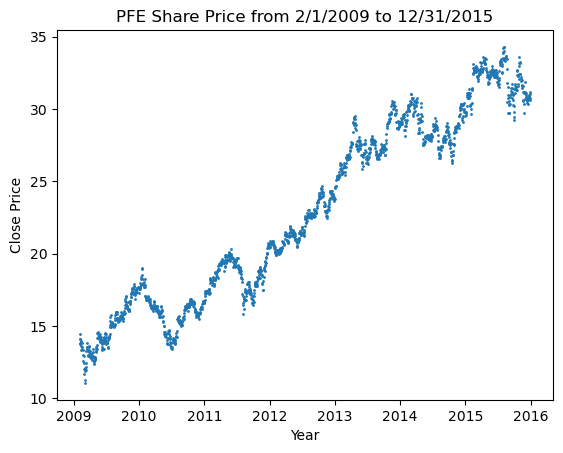

In [29]:
# Code cell for Problem 17 - do not modify or delete this line
import matplotlib.pyplot as plt
sph1 = pd.read_csv('PFESharePriceHistory.csv')
sph1['Date'] = pd.to_datetime(sph1['Date'])
sph2 = sph1[(sph1['Date'] >= '2009-02-01') & (sph1['Date'] <= '2015-12-31')]
plt.scatter(sph2['Date'], sph2['Close'], s=1)
plt.title('PFE Share Price from 2/1/2009 to 12/31/2015')
plt.xlabel('Year')
plt.ylabel('Close Price')
plt.show()

**Problem 18**

Plot the "Close" price (y-axis) vs Date (x-axis) in a **scatter plot** for the period from 6/1/2007 to 3/5/2009.  Use s=1 for the size of the points. You should see price drop overall during this period.

Use the following cell for your code.

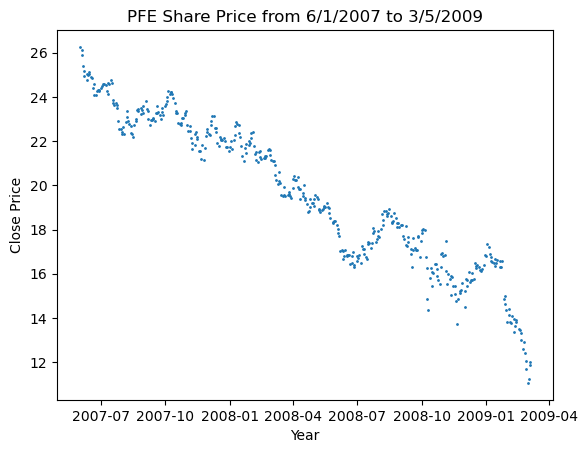

In [30]:
# Code cell for Problem 18 - do not modify or delete this line
sph1 = pd.read_csv('PFESharePriceHistory.csv')
sph1['Date'] = pd.to_datetime(sph1['Date'])
sph2 = sph1[(sph1['Date'] >= '2007-06-01') & (sph1['Date'] <= '2009-03-05')]
plt.scatter(sph2['Date'], sph2['Close'], s=1)
plt.title('PFE Share Price from 6/1/2007 to 3/5/2009')
plt.xlabel('Year')
plt.ylabel('Close Price')
plt.show()

**Problem 19**

We would like to determine whether there is a tendency to acquire shares before a rise in price or to dispose of shares before a drop in price, which may constiture evidence of insider trading.

Write a function called **SummarizeTransactionsDuringPeriod** that takes as inputs:

- **date1** = a datetime 
- **date2** = a date time after date1 

and returns as output a data frame consisting of two columns

- **OwnerName** = name of owner
- **NShares** = number of acquired minus shares disposed of for all transactions for the owner from date1 up to and including date2.

with the data frame sorted by NShares from smallest to largest.

**Your solution should be based on data in df2 and should have a row for every owner in df2 whose NShares value is non-zero.**

Use the following function for your code.

In [31]:
# Code cell for Problem 19 - do not modify or delete this line
def SummarizeTransactionsDuringPeriod(date1, date2):
    period = df2[(df2['TransDate'] >= date1) & (df2['TransDate'] <= date2)]
    summary = period.groupby('OwnerName').apply(
        lambda x: x[x['ADCode'] == 'A']['Shares'].sum() - x[x['ADCode'] == 'D']['Shares'].sum()
    ).reset_index(name='NShares')
    summary = summary[summary['NShares'] != 0]
    summary = summary.sort_values(by='NShares')
    return summary

In [32]:
# Test cell for Problem 19 - do not modify or delete this cell
# Do execute it
date1=datetime.datetime(2005,3,1)
date2=datetime.datetime(2007,6,1)
dt=SummarizeTransactionsDuringPeriod(date1,date2)
print(dt.to_string())

               OwnerName   NShares
13   STEERE WILLIAM C JR -457157.0
4     GRAY III WILLIAM H    -980.0
8           LEVIN ALAN G    8518.0
1          BURT ROBERT N   10000.0
0       BAGGER RICHARD H   18560.0
14        WAXMAN ALLEN P   19745.0
10         MCLEOD MARY S   20000.0
2   CANGIALOSI LORETTA V   23862.0
12      SHEDLARZ DAVID L   36789.0
11            READ IAN C   47211.0
3        FECZKO JOSEPH M   64183.0
7       LAMATTINA JOHN L   75034.0
6      KINDLER JEFFREY B   97391.0
5          KATEN KAREN L  106582.0
9      MCKINNELL HENRY A  600507.0


**Make sure all cells can be executed without errors.**

**Make sure to save the notebook before you submit it.**